In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.metrics import f1_score

In [26]:
df = pd.read_csv(r"C:\Users\comp\Downloads\GPS Copy(AutoRecovered).csv")
df.head()

,Time(min),X Axis(m/s2),Y Axis(m/s2),Z Axis(m/s2),Age(years),Latitude,Longitude,Gender,Name Of Driver,Speed(Kmphr),Ride,result,count
0,3.03,0.75,-0.31,9.10,21,18.456760,73.882698,1,DeepJadhav,0.07,0.0,0,1.0
1,3.03,0.55,-0.39,9.06,21,18.456739,73.882736,1,DeepJadhav,0.09,NaN,0,2.0
2,3.03,0.59,-0.39,9.10,21,18.456739,73.882736,1,DeepJadhav,0.09,NaN,0,3.0
3,3.03,-0.39,-4.12,11.02,21,18.456747,73.882721,1,DeepJadhav,0.30,NaN,0,4.0
4,3.03,-1.18,-1.69,11.34,21,18.456709,73.882256,1,DeepJadhav,0.30,NaN,0,5.0


In [27]:
df.drop(['Name Of Driver','Ride','count'],axis='columns',inplace=True)
df.head()

,Time(min),X Axis(m/s2),Y Axis(m/s2),Z Axis(m/s2),Age(years),Latitude,Longitude,Gender,Speed(Kmphr),result
0,3.03,0.75,-0.31,9.10,21,18.456760,73.882698,1,0.07,0
1,3.03,0.55,-0.39,9.06,21,18.456739,73.882736,1,0.09,0
2,3.03,0.59,-0.39,9.10,21,18.456739,73.882736,1,0.09,0
3,3.03,-0.39,-4.12,11.02,21,18.456747,73.882721,1,0.30,0
4,3.03,-1.18,-1.69,11.34,21,18.456709,73.882256,1,0.30,0


In [28]:
df.describe()

,Time(min),X Axis(m/s2),Y Axis(m/s2),Z Axis(m/s2),Age(years),Latitude,Longitude,Gender,Speed(Kmphr),result
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,1.536258,-0.202349,-0.397484,9.019605,19.910603,18.456754,73.881876,0.571726,11.443098,0.401247
std,0.686270,1.335639,2.990066,2.961881,1.244284,0.000107,0.001406,0.495344,10.548879,0.490661
min,0.270000,-4.940000,-15.770000,-6.200000,18.000000,18.456459,73.878326,0.000000,0.000000,0.000000
25%,1.150000,-1.020000,-1.960000,7.490000,19.000000,18.456707,73.881783,0.000000,0.390000,0.000000
50%,1.420000,-0.350000,-0.240000,8.980000,20.000000,18.456757,73.882431,1.000000,11.410000,0.000000
75%,1.750000,0.470000,1.330000,10.160000,21.000000,18.456802,73.882896,1.000000,20.610000,1.000000
max,3.780000,4.280000,9.890000,20.240000,22.000000,18.457355,73.883080,1.000000,42.560000,1.000000


ValueError: Could not interpret value `X Axis` for parameter `x`

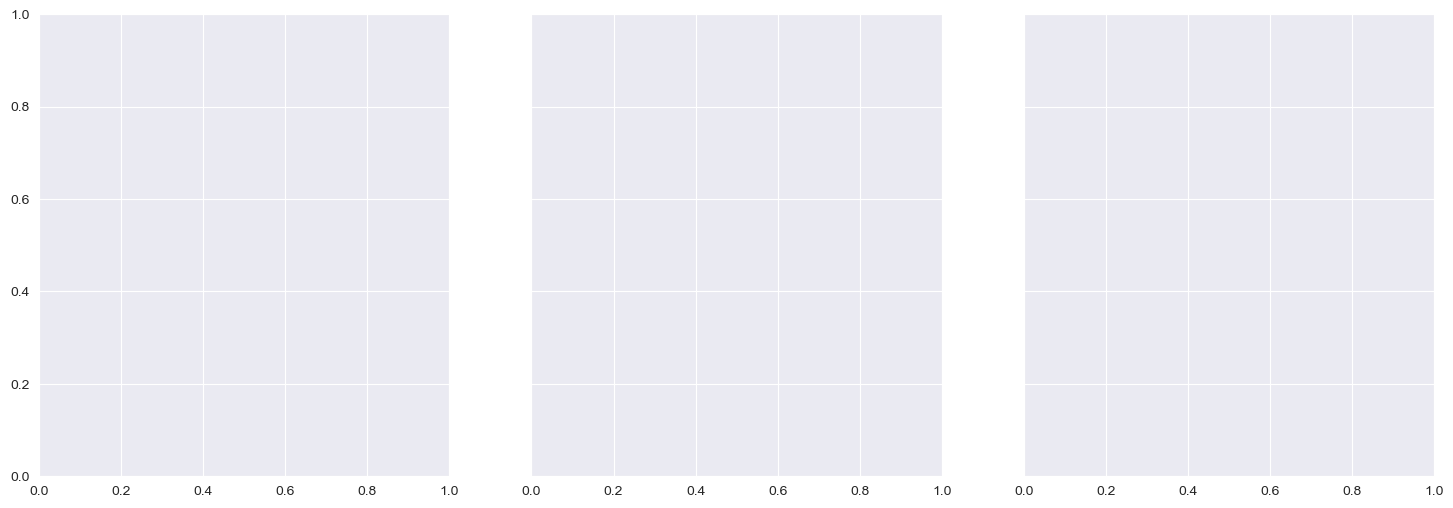

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df, ax=axes[0], x="X Axis", kde=True, color='b')
sns.histplot(df, ax=axes[1], x="Y Axis", kde=True, color='b')
sns.histplot(df, ax=axes[2], x="Z Axis", kde=True, color='b')

In [ ]:
inputs = df.drop('result',axis='columns')
target = df.result

In [ ]:
inputs.columns[inputs.isna().any()]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

mm = MinMaxScaler()
X_train_mm_scaled = mm.fit_transform(X_train)
X_test_mm_scaled = mm.transform(X_test)

def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()),
          ('Gaussian', GaussianNB())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_mm_scaled.predict(X_test_mm_scaled)
        
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred), 5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled), 5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled), 5)
        
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")


In [ ]:
run_models(X_train, y_train, X_test, y_test)

In [ ]:
model = RandomForestClassifier(random_state=2020)

model.fit(X_train,y_train)

model.score(X_test,y_test)

In [ ]:
X_test[0:10]

In [ ]:
true = y_test[0:10]

In [ ]:
y_pred = model.predict(X_test[0:10])

In [ ]:
f1_score(true, y_pred, average='micro')

In [31]:
import pickle
from sklearn.metrics import classification_report, confusion_matrix
model_pkl_file = "ob.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

NameError: name 'model' is not defined

In [22]:
# load model from pickle file
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(X_test)

# check results
print(classification_report(y_test, y_predict)) 

EOFError: Ran out of input

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_train.unique()

In [ ]:
confusion_matrix(y_test, y_predict)

In [ ]:
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns= column,index=indices)
    return table

In [ ]:
plot(y_test, y_predict)

In [ ]:
def plot2(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns= column,index=indices)
    return sns.heatmap(table, annot=True, fmt ='d', cmap='viridis')

In [ ]:
plot2(y_test, y_predict)